In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas
RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [4]:
NUM_CLASSES = 8

# Dataset reading

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)
model.built = True

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 8)                 88        
                                                                 
Total params: 1158 (4.52 KB)
Trainable params: 1158 (4.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)


In [11]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/36 [..............................] - ETA: 6s - loss: 2.2992 - accuracy: 0.0312
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 2.0877 - accuracy: 0.1391 - val_loss: 1.9452 - val_accuracy: 0.2754
Epoch 2/1000
 1/36 [..............................] - ETA: 0s - loss: 1.9469 - accuracy: 0.2812
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
36/36 [==============================] - 0s 1ms/step - loss: 1.9195 - accuracy: 0.2577 - val_loss: 1.8034 - val_accuracy: 0.3001
Epoch 3/1000
 1/36 [..............................] - ETA: 0s - loss: 1.9141 - accuracy: 0.2344
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
36/36 [==============================] - 0s 972us/step - loss: 1.8036 - accuracy: 0.3233 - val_loss: 1.6760 - val_accuracy: 0.4338
Epoch 4/1000
 1/36 [..............................] - ETA: 0s - loss: 1.8026 - accuracy: 0.3438

/Users/shrijayan.rajendran/Desktop/hand-gesture-recognition-mediapipe/hand_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 7: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
36/36 [==============================] - 0s 2ms/step - loss: 1.5481 - accuracy: 0.4080 - val_loss: 1.3923 - val_accuracy: 0.5856
Epoch 8/1000
 1/36 [..............................] - ETA: 0s - loss: 1.4954 - accuracy: 0.4219
Epoch 8: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
36/36 [==============================] - 0s 1ms/step - loss: 1.5119 - accuracy: 0.4190 - val_loss: 1.3434 - val_accuracy: 0.6043
Epoch 9/1000
 1/36 [..............................] - ETA: 0s - loss: 1.4887 - accuracy: 0.3906
Epoch 9: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
36/36 [==============================] - 0s 991us/step - loss: 1.4765 - accuracy: 0.4323 - val_loss: 1.2960 - val_accuracy: 0.6083
Epoch 10/1000
 1/36 [..............................] - ETA: 0s - loss: 1.3416 - accuracy: 0.4609
Epoch 10: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
36/36 [=========

In [13]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

12/12 [==============================] - 0s 482us/step - loss: 0.4368 - accuracy: 0.9211


In [14]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [15]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 39ms/step
[4.0670179e-02 9.1289312e-02 8.4988791e-01 3.2872058e-04 8.7404381e-03
 7.7593224e-03 9.9442340e-04 3.2969806e-04]
2


# Confusion matrix

47/47 [==============================] - 0s 298us/step


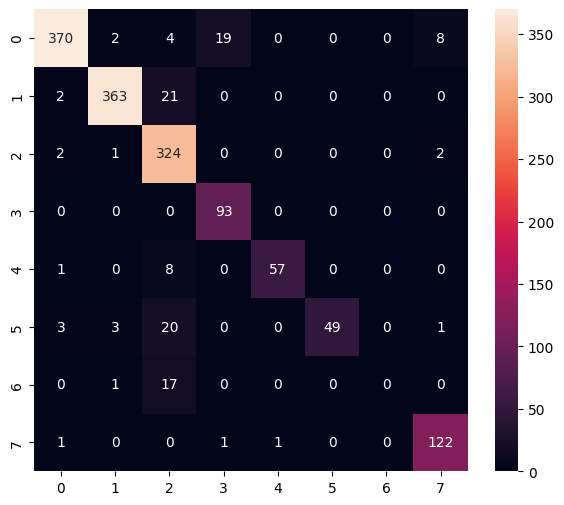

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       403
           1       0.98      0.94      0.96       386
           2       0.82      0.98      0.90       329
           3       0.82      1.00      0.90        93
           4       0.98      0.86      0.92        66
           5       1.00      0.64      0.78        76
           6       0.00      0.00      0.00        18
           7       0.92      0.98      0.95       125

    accuracy                           0.92      1496
   macro avg       0.81      0.79      0.79      1496
weighted avg       0.92      0.92      0.92      1496



/Users/shrijayan.rajendran/Desktop/hand-gesture-recognition-mediapipe/hand_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shrijayan.rajendran/Desktop/hand-gesture-recognition-mediapipe/hand_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shrijayan.rajendran/Desktop/hand-gesture-recognition-mediapipe/hand_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels w

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [17]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

/Users/shrijayan.rajendran/Desktop/hand-gesture-recognition-mediapipe/hand_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/h4/8l1qm8k97mn4whg778yd7ckw0000gn/T/tmptirwubuf/assets


INFO:tensorflow:Assets written to: /var/folders/h4/8l1qm8k97mn4whg778yd7ckw0000gn/T/tmptirwubuf/assets
2024-06-07 17:26:29.433970: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2024-06-07 17:26:29.433980: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2024-06-07 17:26:29.434200: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/h4/8l1qm8k97mn4whg778yd7ckw0000gn/T/tmptirwubuf
2024-06-07 17:26:29.434735: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2024-06-07 17:26:29.434740: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /var/folders/h4/8l1qm8k97mn4whg778yd7ckw0000gn/T/tmptirwubuf
2024-06-07 17:26:29.436098: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled
2024-06-07 17:26:29.436797: I tensorflow/cc/saved_model/load

6724

# Inference test

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [20]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 110 µs, sys: 45 µs, total: 155 µs
Wall time: 169 µs


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[4.0670168e-02 9.1289297e-02 8.4988791e-01 3.2872058e-04 8.7404381e-03
 7.7593192e-03 9.9442306e-04 3.2969791e-04]
2
